In [1]:
# process 7 PAH EPR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil, time

import warnings
warnings.filterwarnings('ignore')

import sys
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"
sys.path.insert(0, util_path)

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/3_bmd_feasibility_BMD/each/7_PAH/EPR


In [18]:
#EPR data file
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/7_PAH/01_11_2021/input/wide/7_PAH_zf_EPR_data_2021JAN11_wide_t1_t50_devel.csv'
epr_all_data= pd.read_csv(complete_file_path, header = 0)
display(epr_all_data.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50
0,3762,21269,A01,3762_21269_A01,100.0,0.000000,24.956625,2.126737,0.000000,0.000000,0.0,11.414936,0.000000,0.000000,0.000000,0.000000,12.109383,0.000000,0.000000,0.000000,7.269962,7.335067,0.000000,0.000000,0.000000,0.000000,33.854166,0.000000,0.000000,0.000000,0.000000,48.502650,0.000000,0.000000,0.000000,15.212685,0.000000,29.861136,0.065104,0.000000,37.413162,0.021701,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,3762,21269,A02,3762_21269_A02,100.0,6.749119,0.000000,0.000000,20.941841,0.000000,0.0,0.000000,0.000000,0.000000,4.361978,15.342875,14.930542,0.000000,0.000000,3.580719,6.358509,0.000000,0.000000,0.000000,0.021701,0.000000,30.512134,2.625867,0.000000,0.000000,0.000000,0.000000,23.350731,0.000000,0.000000,0.000000,14.930559,0.325522,9.418387,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,57.421894,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,3762,21269,A03,3762_21269_A03,100.0,0.000000,28.689219,19.661444,0.000000,0.000000,0.0,0.000000,17.990419,0.000000,0.000000,22.243938,0.000000,3.537313,10.503456,0.000000,0.000000,0.000000,5.794259,13.585076,0.000000,0.000000,22.634552,0.000000,30.360225,1.106772,0.000000,0.000000,37.000889,0.000000,0.000000,11.892357,0.000000,0.000000,35.785594,4.383681,0.000000,0.000000,0.0,43.402809,0.00000,0.000000,0.0,0.0,37.890635,0.021701,0.000000,0.0,0.0,0.0,0.000000
3,3762,21269,A04,3762_21269_A04,100.0,0.000000,38.368058,0.000000,0.000000,31.228287,0.0,0.000000,0.000000,57.747394,1.974825,0.000000,0.000000,0.000000,35.069419,0.390626,0.000000,0.000000,34.592021,0.000000,0.000000,0.000000,0.000000,38.975678,0.000000,0.000000,0.000000,34.657094,21.918408,0.000000,0.000000,0.000000,0.000000,31.922741,0.000000,0.000000,0.000000,0.000000,0.0,10.416656,29.88284,0.000000,0.0,0.0,0.000000,0.000000,31.532106,0.0,0.0,0.0,38.281251
4,3762,21269,A05,3762_21269_A05,100.0,0.000000,0.000000,0.000000,0.000000,24.175362,0.0,0.000000,33.268228,0.000000,0.000000,0.000000,30.316864,0.043403,13.368063,33.875892,0.000000,0.000000,23.958344,0.000000,0.000000,35.980875,22.005206,0.000000,34.830714,28.667545,4.578991,0.000000,43.402788,0.260417,4.405375,42.491339,0.000000,53.342009,19.921895,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,16.124142,0.0,0.0,18.294272,0.000000,54.861156,0.0,0.0,0.0,0.000000


In [19]:
#display("epr_all_data.shape:" + str(epr_all_data.shape))
# Convert plate ids to ints
epr_all_data['plate.id'] = (epr_all_data['plate.id'].values).astype(int)
display(epr_all_data.tail())

,chemical.id,plate.id,well,chemical_plate_well,conc,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50
283,3762,21295,H08,3762_21295_H08,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021701,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.021701,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.763909,218.511250,206.727344,141.731794,172.178781,124.913169,28.081604,10.828997,4.123265,2.430553,1.605903,8.940969,7.378483,0.0,0.0,0.0,0.0,0.0,0.0
284,3762,21295,H09,3762_21295_H09,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.942719,120.182218,206.835906,130.121519,38.932299,0.347222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
285,3762,21295,H10,3762_21295_H10,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.184013,35.177956,27.625875,24.023420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
286,3762,21295,H11,3762_21295_H11,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,15.039059,38.541679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,51.584206,0.130208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
287,3762,21295,H12,3762_21295_H12,0.0,27.56075,15.190956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,21.549497,11.219628,0.0,36.523409,0.499132,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,54.427069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.177103,65.169259,2.886283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
np.unique(epr_all_data.well)

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06',
       'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'C01', 'C02', 'C03',
       'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12',
       'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
       'D10', 'D11', 'D12', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06',
       'E07', 'E08', 'E09', 'E10', 'E11', 'E12', 'F01', 'F02', 'F03',
       'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12',
       'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10', 'G11', 'G12', 'H01', 'H02', 'H03', 'H04', 'H05', 'H06',
       'H07', 'H08', 'H09', 'H10', 'H11', 'H12'], dtype=object)

In [22]:
unique_chemical_IDs = np.unique(epr_all_data['chemical.id'])
count_wells_compounds_concentration = pd.DataFrame(columns = ['Compound', 'Concentration', 'Number_Wells'])

# Count number of wells for each chemical
for chemical_ID in unique_chemical_IDs:
    epr_data_subset = epr_all_data.loc[epr_all_data['chemical.id'] == chemical_ID]
    print('\nPlates/Wells/Concentration information about compound:', chemical_ID)
    print('Plate IDs:', np.unique(epr_data_subset['plate.id']))
    print('Number of unique plates:', len(np.unique(epr_data_subset['plate.id'])))
    print('Concentrations tested:', np.unique(epr_data_subset['conc']))
    print('Number of concentrations:', len(np.unique(epr_data_subset['conc'])))
    print('Total number of wells:', epr_data_subset.shape[0])
    for concentration_id in np.unique(epr_data_subset['conc']):
        epr_data_subset_concs = epr_data_subset.loc[epr_data_subset['conc'] == concentration_id]
        print('Number of wells for compound ID', chemical_ID, 'and concentration', concentration_id, 'are', len((epr_data_subset_concs['well'])))
        count_wells_compounds_concentration = count_wells_compounds_concentration.append({'Compound': chemical_ID, 'Concentration': concentration_id, 'Number_Wells': len((epr_data_subset_concs['well']))}, ignore_index = True)


Plates/Wells/Concentration information about compound: 3762
Plate IDs: [21269 21294 21295]
Number of unique plates: 3
Concentrations tested: [  0.     2.16   6.8   14.7   31.6   56.2   75.   100.  ]
Number of concentrations: 8
Total number of wells: 288
Number of wells for compound ID 3762 and concentration 0.0 are 36
Number of wells for compound ID 3762 and concentration 2.16 are 36
Number of wells for compound ID 3762 and concentration 6.8 are 36
Number of wells for compound ID 3762 and concentration 14.7 are 36
Number of wells for compound ID 3762 and concentration 31.6 are 36
Number of wells for compound ID 3762 and concentration 56.2 are 36
Number of wells for compound ID 3762 and concentration 75.0 are 36
Number of wells for compound ID 3762 and concentration 100.0 are 36


## Load morphological data for filtering wells that have dead fish

In [7]:
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/7_PAH/01_11_2021/input/wide/7_PAH_zf_morphology_data_2021JAN11_wide_made_in_2021_01_19_DNC_0.csv'
morphology_all_data = pd.read_csv(morph_data_file_complete_path, header = 0)
display(morphology_all_data.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR
0,3756,20544,A01,3756_20544_A01,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3756,20544,A03,3756_20544_A03,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Goal of this box -> (in epr_all_data) leave only rows with non 1 and NA MORT

# 1. Append additional identifier column (Plate_Well value) to epr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 and not NA
# 3. Using Plate_Well values, find corresponding rows in epr data to filter the data
epr_all_data['Chemical_Plate_WELL'] = epr_all_data[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#print("\nepr_all_data.shape:" + str(epr_all_data.shape))
display(len(epr_all_data))
display(epr_all_data.head())
#display(epr_all_data['Chemical_Plate_WELL'].head())

morphology_all_data['Chemical_Plate_WELL'] = morphology_all_data[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
#print("morphology_all_data.shape:" + str(morphology_all_data.shape))

morphology_nonna_data_plate_well = morphology_all_data.Chemical_Plate_WELL[~((morphology_all_data.MORT == 1) | (morphology_all_data.MORT.isnull()))]
#print("morphology_nonna_data_plate_well.shape:" + str(morphology_nonna_data_plate_well.shape))
#display(morphology_nonna_data_plate_well.head())

epr_filtered_data = epr_all_data.loc[epr_all_data['Chemical_Plate_WELL'].isin(list(morphology_nonna_data_plate_well.values))]
#print("epr_filtered_data.shape:"+str(epr_filtered_data.shape)+"\n")
display(len(epr_filtered_data))
display(epr_filtered_data.head())

288

,chemical.id,plate.id,well,chemical_plate_well,conc,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,Chemical_Plate_WELL
0,3762,21269,A01,3762_21269_A01,100.0,0.000000,24.956625,2.126737,0.000000,0.000000,0.0,11.414936,0.000000,0.000000,0.000000,0.000000,12.109383,0.000000,0.000000,0.000000,7.269962,7.335067,0.000000,0.000000,0.000000,0.000000,33.854166,0.000000,0.000000,0.000000,0.000000,48.502650,0.000000,0.000000,0.000000,15.212685,0.000000,29.861136,0.065104,0.000000,37.413162,0.021701,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,3762_21269_A01
1,3762,21269,A02,3762_21269_A02,100.0,6.749119,0.000000,0.000000,20.941841,0.000000,0.0,0.000000,0.000000,0.000000,4.361978,15.342875,14.930542,0.000000,0.000000,3.580719,6.358509,0.000000,0.000000,0.000000,0.021701,0.000000,30.512134,2.625867,0.000000,0.000000,0.000000,0.000000,23.350731,0.000000,0.000000,0.000000,14.930559,0.325522,9.418387,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,57.421894,0.000000,0.000000,0.0,0.0,0.0,0.000000,3762_21269_A02
2,3762,21269,A03,3762_21269_A03,100.0,0.000000,28.689219,19.661444,0.000000,0.000000,0.0,0.000000,17.990419,0.000000,0.000000,22.243938,0.000000,3.537313,10.503456,0.000000,0.000000,0.000000,5.794259,13.585076,0.000000,0.000000,22.634552,0.000000,30.360225,1.106772,0.000000,0.000000,37.000889,0.000000,0.000000,11.892357,0.000000,0.000000,35.785594,4.383681,0.000000,0.000000,0.0,43.402809,0.00000,0.000000,0.0,0.0,37.890635,0.021701,0.000000,0.0,0.0,0.0,0.000000,3762_21269_A03
3,3762,21269,A04,3762_21269_A04,100.0,0.000000,38.368058,0.000000,0.000000,31.228287,0.0,0.000000,0.000000,57.747394,1.974825,0.000000,0.000000,0.000000,35.069419,0.390626,0.000000,0.000000,34.592021,0.000000,0.000000,0.000000,0.000000,38.975678,0.000000,0.000000,0.000000,34.657094,21.918408,0.000000,0.000000,0.000000,0.000000,31.922741,0.000000,0.000000,0.000000,0.000000,0.0,10.416656,29.88284,0.000000,0.0,0.0,0.000000,0.000000,31.532106,0.0,0.0,0.0,38.281251,3762_21269_A04
4,3762,21269,A05,3762_21269_A05,100.0,0.000000,0.000000,0.000000,0.000000,24.175362,0.0,0.000000,33.268228,0.000000,0.000000,0.000000,30.316864,0.043403,13.368063,33.875892,0.000000,0.000000,23.958344,0.000000,0.000000,35.980875,22.005206,0.000000,34.830714,28.667545,4.578991,0.000000,43.402788,0.260417,4.405375,42.491339,0.000000,53.342009,19.921895,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,16.124142,0.0,0.0,18.294272,0.000000,54.861156,0.0,0.0,0.0,0.000000,3762_21269_A05


282

,chemical.id,plate.id,well,chemical_plate_well,conc,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,Chemical_Plate_WELL
0,3762,21269,A01,3762_21269_A01,100.0,0.000000,24.956625,2.126737,0.000000,0.000000,0.0,11.414936,0.000000,0.000000,0.000000,0.000000,12.109383,0.000000,0.000000,0.000000,7.269962,7.335067,0.000000,0.000000,0.000000,0.000000,33.854166,0.000000,0.000000,0.000000,0.000000,48.502650,0.000000,0.000000,0.000000,15.212685,0.000000,29.861136,0.065104,0.000000,37.413162,0.021701,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,3762_21269_A01
1,3762,21269,A02,3762_21269_A02,100.0,6.749119,0.000000,0.000000,20.941841,0.000000,0.0,0.000000,0.000000,0.000000,4.361978,15.342875,14.930542,0.000000,0.000000,3.580719,6.358509,0.000000,0.000000,0.000000,0.021701,0.000000,30.512134,2.625867,0.000000,0.000000,0.000000,0.000000,23.350731,0.000000,0.000000,0.000000,14.930559,0.325522,9.418387,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,57.421894,0.000000,0.000000,0.0,0.0,0.0,0.000000,3762_21269_A02
2,3762,21269,A03,3762_21269_A03,100.0,0.000000,28.689219,19.661444,0.000000,0.000000,0.0,0.000000,17.990419,0.000000,0.000000,22.243938,0.000000,3.537313,10.503456,0.000000,0.000000,0.000000,5.794259,13.585076,0.000000,0.000000,22.634552,0.000000,30.360225,1.106772,0.000000,0.000000,37.000889,0.000000,0.000000,11.892357,0.000000,0.000000,35.785594,4.383681,0.000000,0.000000,0.0,43.402809,0.00000,0.000000,0.0,0.0,37.890635,0.021701,0.000000,0.0,0.0,0.0,0.000000,3762_21269_A03
3,3762,21269,A04,3762_21269_A04,100.0,0.000000,38.368058,0.000000,0.000000,31.228287,0.0,0.000000,0.000000,57.747394,1.974825,0.000000,0.000000,0.000000,35.069419,0.390626,0.000000,0.000000,34.592021,0.000000,0.000000,0.000000,0.000000,38.975678,0.000000,0.000000,0.000000,34.657094,21.918408,0.000000,0.000000,0.000000,0.000000,31.922741,0.000000,0.000000,0.000000,0.000000,0.0,10.416656,29.88284,0.000000,0.0,0.0,0.000000,0.000000,31.532106,0.0,0.0,0.0,38.281251,3762_21269_A04
4,3762,21269,A05,3762_21269_A05,100.0,0.000000,0.000000,0.000000,0.000000,24.175362,0.0,0.000000,33.268228,0.000000,0.000000,0.000000,30.316864,0.043403,13.368063,33.875892,0.000000,0.000000,23.958344,0.000000,0.000000,35.980875,22.005206,0.000000,34.830714,28.667545,4.578991,0.000000,43.402788,0.260417,4.405375,42.491339,0.000000,53.342009,19.921895,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,16.124142,0.0,0.0,18.294272,0.000000,54.861156,0.0,0.0,0.0,0.000000,3762_21269_A05


In [10]:
#(set(list(morphology_nonna_data_plate_well)) - set(list(epr_all_data['Chemical_Plate_WELL'])))

In [11]:
#missmatched_data = (set(list(morphology_all_data['Chemical_Plate_WELL'])) - set(list(epr_all_data['Chemical_Plate_WELL'])))
#with open('chemicals_difference_morph_t0_t239_behav.txt', 'w') as filehandle:
#    for listitem in missmatched_data:
#        filehandle.write('%s\n' % listitem)

In [32]:
epr_filtered_data.head()

,chemical.id,plate.id,well,chemical_plate_well,conc,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,Chemical_Plate_WELL
0,3762,21269,A01,3762_21269_A01,100.0,0.000000,24.956625,2.126737,0.000000,0.000000,0.0,11.414936,0.000000,0.000000,0.000000,0.000000,12.109383,0.000000,0.000000,0.000000,7.269962,7.335067,0.000000,0.000000,0.000000,0.000000,33.854166,0.000000,0.000000,0.000000,0.000000,48.502650,0.000000,0.000000,0.000000,15.212685,0.000000,29.861136,0.065104,0.000000,37.413162,0.021701,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,3762_21269_A01
1,3762,21269,A02,3762_21269_A02,100.0,6.749119,0.000000,0.000000,20.941841,0.000000,0.0,0.000000,0.000000,0.000000,4.361978,15.342875,14.930542,0.000000,0.000000,3.580719,6.358509,0.000000,0.000000,0.000000,0.021701,0.000000,30.512134,2.625867,0.000000,0.000000,0.000000,0.000000,23.350731,0.000000,0.000000,0.000000,14.930559,0.325522,9.418387,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,57.421894,0.000000,0.000000,0.0,0.0,0.0,0.000000,3762_21269_A02
2,3762,21269,A03,3762_21269_A03,100.0,0.000000,28.689219,19.661444,0.000000,0.000000,0.0,0.000000,17.990419,0.000000,0.000000,22.243938,0.000000,3.537313,10.503456,0.000000,0.000000,0.000000,5.794259,13.585076,0.000000,0.000000,22.634552,0.000000,30.360225,1.106772,0.000000,0.000000,37.000889,0.000000,0.000000,11.892357,0.000000,0.000000,35.785594,4.383681,0.000000,0.000000,0.0,43.402809,0.00000,0.000000,0.0,0.0,37.890635,0.021701,0.000000,0.0,0.0,0.0,0.000000,3762_21269_A03
3,3762,21269,A04,3762_21269_A04,100.0,0.000000,38.368058,0.000000,0.000000,31.228287,0.0,0.000000,0.000000,57.747394,1.974825,0.000000,0.000000,0.000000,35.069419,0.390626,0.000000,0.000000,34.592021,0.000000,0.000000,0.000000,0.000000,38.975678,0.000000,0.000000,0.000000,34.657094,21.918408,0.000000,0.000000,0.000000,0.000000,31.922741,0.000000,0.000000,0.000000,0.000000,0.0,10.416656,29.88284,0.000000,0.0,0.0,0.000000,0.000000,31.532106,0.0,0.0,0.0,38.281251,3762_21269_A04
4,3762,21269,A05,3762_21269_A05,100.0,0.000000,0.000000,0.000000,0.000000,24.175362,0.0,0.000000,33.268228,0.000000,0.000000,0.000000,30.316864,0.043403,13.368063,33.875892,0.000000,0.000000,23.958344,0.000000,0.000000,35.980875,22.005206,0.000000,34.830714,28.667545,4.578991,0.000000,43.402788,0.260417,4.405375,42.491339,0.000000,53.342009,19.921895,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,16.124142,0.0,0.0,18.294272,0.000000,54.861156,0.0,0.0,0.0,0.000000,3762_21269_A05


In [162]:
# Convert time resolution to minutes (if applicable)
# for EPR, 50 -> 5

# Create a new dataframe for storing epr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields

epr_filtered_data_in_minute = epr_filtered_data[['chemical.id', 'conc', 'plate.id', 'well']]

print ("epr_filtered_data_in_minute.shape:\n" + str(epr_filtered_data_in_minute.shape)) # (282, 4)
epr_filtered_data_in_minute.head()

time_index_sec_start = 1
max_time_index_sec = 50  # from 1 to 50

#report = True
report = False

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
print ("interval:" + str(interval))
if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)

for time_index in range(int(max_time_index_sec / group_size)):
    if (report):
        print ("\ntime_index:" + str(time_index))
    
    start_index = time_index_sec_start + group_size * time_index
    if (report):
        print ("start_index:" + str(start_index))
    
    end_index = start_index + group_size
    if (report):
        print ("end_index:" + str(end_index))
    
    epr_minutes = pd.DataFrame(np.sum(epr_filtered_data.iloc[:,start_index:end_index], axis = 1))
    if (report):
        print ("epr_minutes.shape:\n" + str(epr_minutes.shape)) # (282, 1)
        display(epr_minutes.head())
        display(epr_minutes.tail())
    
    epr_minutes.columns = ['t' + str(time_index)]
    #print ("epr_minutes.columns:\n" + str(epr_minutes.columns))
    
    #epr_minutes.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    epr_filtered_data_in_minute = pd.concat([epr_filtered_data_in_minute, epr_minutes], axis = 1)
    if (report):
        display(epr_filtered_data_in_minute.head())
        display(epr_filtered_data_in_minute.tail())
#pd.set_option('display.max_columns', None)
epr_filtered_data_in_minute.head()

epr_filtered_data_in_minute.shape:
(282, 4)
interval:1 min


,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4
0,3762,100.0,21269,A01,21396.083362,30.794281,41.189232,131.054737,0.021701
1,3762,100.0,21269,A02,21396.690959,44.574623,33.159702,48.025198,57.421894
2,3762,100.0,21269,A03,21417.350663,54.275125,73.480884,89.062521,81.315145
3,3762,100.0,21269,A04,21438.596345,95.182263,73.567699,88.498243,71.831602
4,3762,100.0,21269,A05,21393.175362,110.872449,150.021674,163.823823,89.279570


interval:1 min
epr_filtered_data_in_minute.shape:(282, 9)


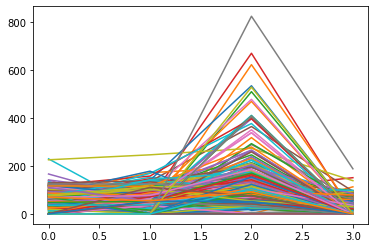

In [163]:
# Plot few epr curves to check transition points
# Plotting to make sure that data makes sense

time_index_start = 5
# because 0-3th columns show irrelevant values
# and 4th column (t0) shows too high time dependent behavioral value

print ("interval:" + str(interval))
if (interval == "1 min"):
    num_time_points = 4
    # results with >= 5 (like 6,7) do not make any difference than the one with 4
elif (interval == "30 sec"):
    num_time_points = 8
else: # (with 12 sec interval)
    num_time_points = 20

print ("epr_filtered_data_in_minute.shape:" + str(epr_filtered_data_in_minute.shape)) 
# 12 sec interval -> (282, 29)
    
fig, ax = plt.subplots()

#print (epr_filtered_data_in_minute.iloc[0:5, time_index_start:time_index_start + num_time_points].values)
# first ':' shows rows, second ':' shows columns

ax.plot(np.transpose(epr_filtered_data_in_minute.iloc[10:335,time_index_start:time_index_start + num_time_points].values));

In [165]:
delta_mov_auc = epr_filtered_data_in_minute[['chemical.id', 'conc', 'plate.id', 'well']].copy()
transition_points = [2]

num_light = 2 # seems reasonable based on above pictures
num_dark  = 2

for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:"+str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    delta_mov_auc['MOV' + str(transition_index + 1)] \
    = epr_filtered_data_in_minute['t' + str(transition_point + 1)] \
    - epr_filtered_data_in_minute['t' + str(transition_point)]
    
    delta_mov_auc['AUC' + str(transition_index + 1)] \
    = sum(epr_filtered_data_in_minute['t' + str(transition_point + 1 + index_count)] \
          for index_count in range(num_dark)) - \
      sum(epr_filtered_data_in_minute['t' + str(transition_point - index_count)] \
          for index_count in range(num_light))
    
display(delta_mov_auc.head())


transition_index:0
transition_point:2


,chemical.id,conc,plate.id,well,MOV1,AUC1
0,3762,100.0,21269,A01,89.865505,59.092925
1,3762,100.0,21269,A02,14.865496,27.712767
2,3762,100.0,21269,A03,15.581637,42.621657
3,3762,100.0,21269,A04,14.930544,-8.420118
4,3762,100.0,21269,A05,13.802148,-7.790731


In [ ]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())

In [ ]:
display(delta_mov_auc.tail())

In [ ]:
import generate_dose_response_newest_no_avg as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [ ]:
start_time = time.time()

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

#full_devel = "full"
full_devel = "devel"

end_points = ['MOV1','AUC1']

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
else:
    chemical_id_from_here = [3756]
    
for chemical_id in chemical_id_from_here:
    print("chemical_id:" + str(chemical_id))
    for end_point in end_points:
        print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 
# for all combinations of 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()

In [ ]:
np.exp((np.log(0.1/(1-0.1)) - 0.00088637)/0.03373856)